### Métodos para encontrar raíces

Importación de librerias

In [2]:
using PyPlot

Funcion original

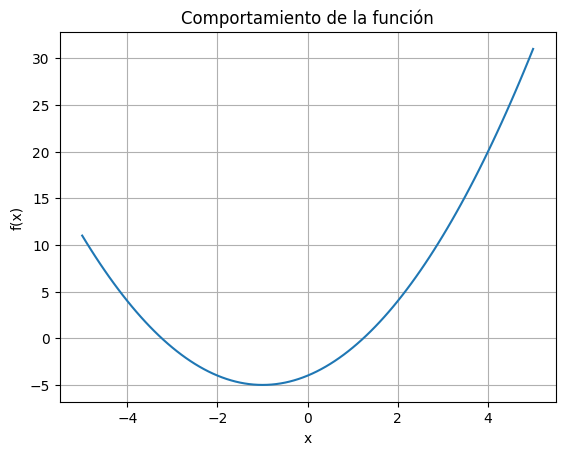

In [3]:
f(x) = x^2 + 2*x - 4
x = collect(-5:0.1:5)
plot(x, f.(x))
title("Comportamiento de la función")
xlabel("x")
ylabel("f(x)")
grid("True")

#### Métodos cerrados

Todos estos metodos se basan en generar intervalos que encierren a la raiz de la función. Esto se logra mediante el Teorema de Bolzano:
- Si $f(x_i)f(x_n) < 0$, la raiz se encuentra dentro del intervalo $[x_i, x_n]$, por lo tanto ahora el nuevo valor de $x_f$ sera $x_n$ $$x_f = x_n$$
- Si $f(x_i)f(x_n) > 0$, la raiz se encuentra dentro del intervalo $[x_n, x_f]$, por lo tanto ahora el nuevo valor de $x_i$ sera $x_n$ $$x_i = x_n$$
- Si $f(x_i)f(x_n) = 0$, la raiz es igual a $x_n$ y se termina el cálculo

##### Biseccion

La ecuación que nos permite generar nuestros nuevas aproximaciones es: $$x_r = \frac{x_i + x_f}{2}$$

In [4]:
function Biseccion(fx, a0, b0, ϵ)
    i = 1 #Iteracion 
    xr = 2 #Aproximacion inicial 
    xr_list = [] # Vector de aproximaciones
    fxr_list = [] # Vector de resultados de la funcion
    i_list = [] # Vector de iteraciones
    while f(xr) <= -ϵ || f(xr) >= ϵ
        #Ecuacion del metodo
        xr = (a0 + b0)/2
        #Descartar subintervalos
        if f(a0)*f(xr) < 0
            b0 = xr 
        end 
        if f(xr)*f(b0) < 0
            a0 = xr 
        end
        # Redefinicion del criterio de error
        append!(xr_list, xr)
        append!(fxr_list, f(xr))
        append!(i_list, i)
        println("Iteracion ",i," = ", xr)
        i += 1
    end
plot(i_list, xr_list, "ob")
title("Solución de raices mediante bisección")
xlabel("Iteraciones")
ylabel("Raiz")
grid("True")
end

Biseccion (generic function with 1 method)

Iteracion 1 = 2.5
Iteracion 2 = 1.25
Iteracion 3 = 0.625
Iteracion 4 = 0.9375
Iteracion 5 = 1.09375
Iteracion 6 = 1.171875
Iteracion 7 = 1.2109375
Iteracion 8 = 1.23046875
Iteracion 9 = 1.240234375
Iteracion 10 = 1.2353515625
Iteracion 11 = 1.23779296875
Iteracion 12 = 1.236572265625
Iteracion 13 = 1.2359619140625
Iteracion 14 = 1.23626708984375
Iteracion 15 = 1.236114501953125
Iteracion 16 = 1.2360382080078125
Iteracion 17 = 1.2360763549804688


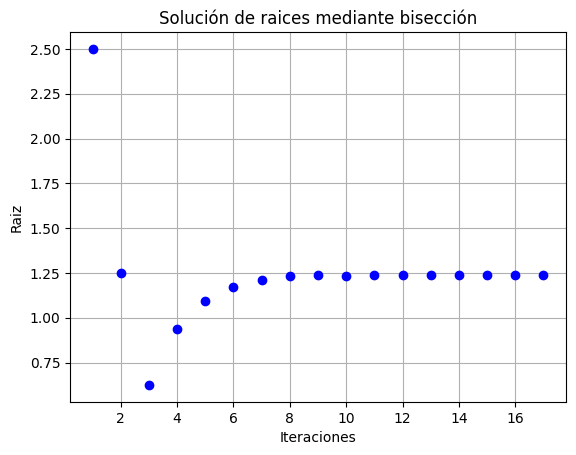

In [5]:
Biseccion(f, 0, 5, 0.0001)

##### Regla falsa

Ecuación de aproximaciones: $$x_r = b − \frac{f(b)\cdot(a − b)}{f(a) − f(b)}$$

In [5]:
function ReglaFalsa(f, a0, b0, ϵ)
    i = 1 #Iteracion 
    xr = 2 #Aproximacion inicial 
    xr_list = [] # Vector de aproximaciones
    fxr_list = [] # Vector de resultados de la funcion
    i_list = [] # Vector de iteraciones
    while f(xr) <= -ϵ || f(xr) >= ϵ
        #Ecuacion del metodo
        xr = b0 - (f(b0)*(a0-b0))/(f(a0)-f(b0))
        #Descartar subintervalos
        if f(a0)*f(xr) < 0
            b0 = xr 
        end 
        if f(xr)*f(b0) < 0
            a0 = xr 
        end
        # Redefinicion del criterio de error
        append!(xr_list, xr)
        append!(fxr_list, f(xr))
        append!(i_list, i)
        println("Iteracion ",i," = ", xr)
        i += 1
    end
plot(i_list, xr_list, "ob")
title("Solución de raices mediante regla falsa")
ylabel("Raiz")
xlabel("Iteraciones")
grid("True")
end

ReglaFalsa (generic function with 1 method)

Iteracion 1 = 0.5714285714285712
Iteracion 2 = 0.9056603773584904
Iteracion 3 = 1.078758949880668
Iteracion 4 = 1.1627769571639588
Iteracion 5 = 1.202272809525533
Iteracion 6 = 1.2205597497319505
Iteracion 7 = 1.2289672548136616
Iteracion 8 = 1.232820104872082
Iteracion 9 = 1.2345830948432144
Iteracion 10 = 1.2353892549322514
Iteracion 11 = 1.2357577716883492
Iteracion 12 = 1.2359262062603218
Iteracion 13 = 1.2360031860853526
Iteracion 14 = 1.236038367205321
Iteracion 15 = 1.236054445370557


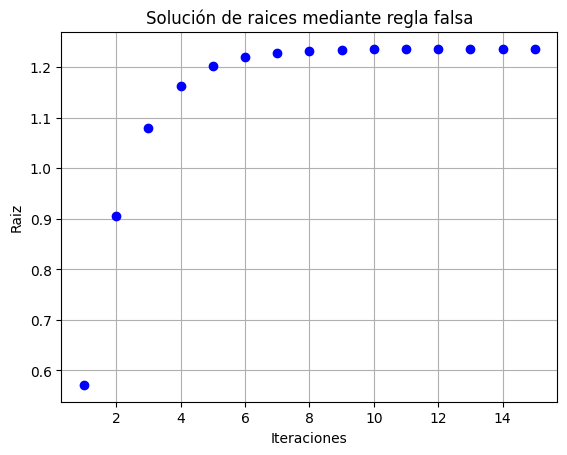

In [6]:
ReglaFalsa(f, 0, 5, 0.0001)

#### Métodos abiertos

##### Punto fijo

Sabemos que la raiz de la función se dara en el momento que esta y su función despejada $g(x)$ intersecten entre si

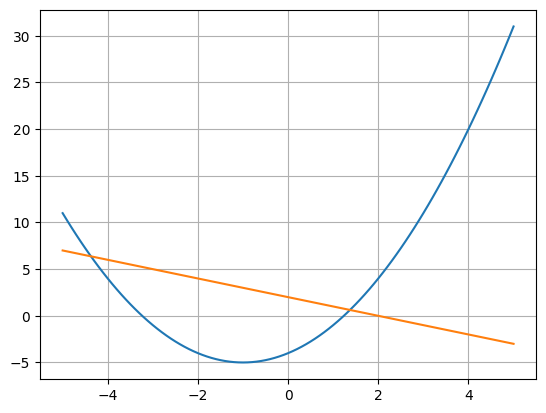

In [7]:
f(x) = x^2 + 2*x - 4
g(x) = (4-2*x)/2
x = collect(-5:0.1:5)
plot(x, f.(x))
plot(x, g.(x))
grid("True")

Como podemos observar, nuestra función $f(x)$ posee dos raices, una cercana a $-4$ y otra cercana a $2$. Sin embargo, la ejecución del codigo que se encuentra debajo posee errores que incluso pueden llevar a un bucle infinito. 

In [1]:
f(x) = x^2 + 2*x - 4
g(x) = (4-x^2)/2

function PuntoFijo(g, x0, ϵ)
    i = 1
    xi_vector = [Float64(x0)]
    Tolerancia = 10
    error_relativo = [0.0]
    while Tolerancia <= -ϵ || Tolerancia >= ϵ
        xrold = x0
        xr = g(xrold)
        append!(xi_vector, xr)
        Tolerancia = abs(xr - xrold)/abs(xr)*100
        append!(error_relativo, Tolerancia)
        println("Iteracion ", i , " = ", x0)
        x0 = xr
        i += 1
    end
end

PuntoFijo(g, -5, 0.0001)

Iteracion 1 = -5
Iteracion 2 = -10.5
Iteracion 3 = -53.125
Iteracion 4 = -1409.1328125
Iteracion 5 = -992825.6416320801
Iteracion 6 = -4.9285137733907574e11
Iteracion 7 = -1.2145124007251202e23
Iteracion 8 = -7.375201857575475e45
Iteracion 9 = -2.7196801219992367e91
Iteracion 10 = -3.6983299829988916e182


##### Newton-Raphson

Ecuación de aproximaciones: $$x_n = x_{n-1}-\frac{f(x)}{f'(x)}$$

In [10]:
df(x) =  2*x + 2

function NewtonRaphson(fx, dfx, x0, ϵ)
    i = 1 # Iteracion
    i_list = []# Vector de iteraciones
    xn_list = [] # Vector de aproximaciones
    fx_list = [] # Vector de resultados fx
    dfx_list = [] # Vector de resultado dfx
    while f(x0) <= -ϵ || f(x0) >= ϵ
        # Criterio de aproximacion
        xn = x0 - f(x0)/dfx(x0)
        println("Iteracion ", i, " = ", xn)
        # Historial de resultados
        append!(i_list, i)
        append!(xn_list, xn)
        append!(fx_list, f(xn))
        append!(dfx_list, dfx(xn))
        x0 = xn
        i += 1
    end
plot(i_list, xn_list, "ob")
title("Solución de raices mediante Newton - Raphson")
ylabel("Raiz")
xlabel("Iteraciones")
grid("True")
end

NewtonRaphson (generic function with 1 method)

Iteracion 1 = 2.0
Iteracion 2 = 1.3333333333333335
Iteracion 3 = 1.2380952380952381
Iteracion 4 = 1.2360688956433639


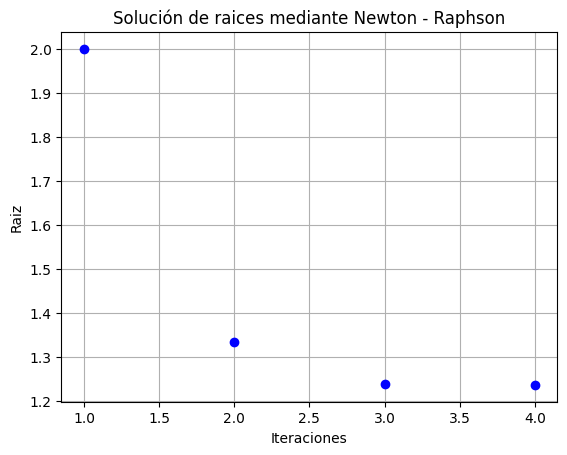

In [11]:
NewtonRaphson(f, df, 0, 0.0001)

##### Secante

Es una combinación del método de Newton - Raphson: 
$$x_n = x_{n-1}-\frac{f(x)}{f'(x)}$$
y una diferencia hacia atrás: 
$$ f'(x_i) \approx \frac{f(x_{i-1})-f(x_i)}{x_{i-1}-x_i} $$
de tal forma que resulta: 
$$ x_n = x_i - \frac{f(x_i)\cdot (x_{i-1}-x_i)}{f(x_{i-1})-f(x_i)} $$

In [13]:
f(x) = x^2 + 2*x - 4

function Dif_Atras(f, x0, h)
    x = x0 - h
    fx_prima = (f(x0) - f(x))/h
    return fx_prima
end

function Secante(f, x0, h, ϵ)
    i = 1
    i_list = []
    xn_list = []
    while f(x0) <= -ϵ || f(x0) >= ϵ
        xr = x0 - f(x0)/Dif_Atras(f, x0, h)
        x0 = xr
        println("Iteracion ", i, " xr = ", xr)
        append!(i_list, i)
        append!(xn_list, xr)
        i += 1
    end
    plot(i_list, xn_list, "ob")
    title("Solución de raices mediante secante")
    ylabel("Raiz")
    xlabel("Iteraciones")
    grid("True")
end

Secante (generic function with 1 method)

Iteracion 1 xr = 1.99799799799796
Iteracion 2 xr = 1.3317777067268917
Iteracion 3 xr = 1.2378307705145106
Iteracion 4 xr = 1.2360647259119115


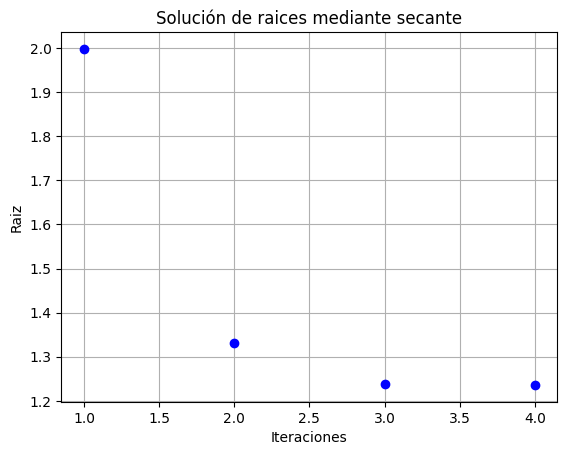

In [14]:
Secante(f, 4, 0.01, 0.001)

#### Conclusiones

Como podemos observar, aunque ambos tipos de metodos permiten acercarnos de manera muy proxima a las raices, poseen diferencias entre ellos. Vamos a resumir estas diferencias de manera concisa:
- Metodos cerrados: requieren que se conozca el intervalo que encierra a las raices; si hay más de dos raices en dicho intervalo, el metodo aproximara la raiz más cercana a nuestro punto de partida
- Metodos abiertos: aunque su convergencia puede ser muy rapida, dependiendo del punto seleccionado pueden presentar indeterminaciones al momento de realizar las aproximaciones

De manera especifica, tenemos que: 
- Metodo de bisección: utiliza fuerza bruta para encontrar la raiz, por lo que si o si debe establecerse el rango en el que se encuentra. 
- Metodo de regla falsa: si la función presenta una sección cercana a una horizonal en el rango establecido, realizará demasiadas iteraciones 
- Metodo de punto fijo: si la función $g(x)$ presenta raices o divisiones que contengan a la variable despejada, el metodo puede no converger debido a la presencia de numeros complejos o indeterminaciones por división por cero
- Metodo de Newton - Raphson: aunque es de los mejores metodos, si la derivada de la función es cero o no existe, el procedimiento se rompe debido a la indeterminación del segundo elemento de la ecuación de aproximacion ()
- Método de la secante: aunque puede parecer la opción más adecuada debido a la conmbinación de una derivada númerica y el metodo de Newton - Raphson, este puede "tronar" al momento de que los valores $x_{i+1}$ y $x_i$ se encuentren del mismo lado de la raiz, causando divergencias. 